In [1]:
import pandas as pd
import numpy as np
from pathlib import PurePosixPath, PureWindowsPath
from matplotlib import pyplot as plt
import tensorflow as tf

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
def get_directory(path):
    if os.name == 'posix':
        return str(PurePosixPath(path))
    else:
        return str(PureWindowsPath(path))

In [3]:
# Variables
FERTILIZER_LOCATION = get_directory('../dataset/fertilizer')
TRAIN_SPLIT = 0.8
# INPUT_HEADERS = ['temperature', 'humidity', 'ph', 'rainfall', 'is_maize', 'is_grape', 'is_apple', 'is_orange', 'label']

In [4]:
_fert = pd.read_excel(get_directory(FERTILIZER_LOCATION + '/Fertilizer Prediction.xlsx'))
#_fert = pd.read_excel('./dataset/fertilizer/Fertilizer Prediction.xlsx')

In [5]:
_fert.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,71,54,16,22.613600,63.690706,5.749914,87.759539,maize
1,61,44,17,26.100184,71.574769,6.931757,102.266244,maize
2,80,43,16,23.558821,71.593514,6.657965,66.719955,maize
3,73,58,21,19.972160,57.682729,6.596061,60.651715,maize
4,61,38,20,18.478913,62.695039,5.970458,65.438354,maize


In [6]:
_fert.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [7]:
# Sanity check - now Label should be gone, replaced by one-hot encodings
_fert

,N,P,K,temperature,humidity,ph,rainfall,label
0,71,54,16,22.613600,63.690706,5.749914,87.759539,maize
1,61,44,17,26.100184,71.574769,6.931757,102.266244,maize
2,80,43,16,23.558821,71.593514,6.657965,66.719955,maize
3,73,58,21,19.972160,57.682729,6.596061,60.651715,maize
4,61,38,20,18.478913,62.695039,5.970458,65.438354,maize
...,...,...,...,...,...,...,...,...
395,27,30,5,32.717485,90.546083,7.656978,113.328978,orange
396,13,8,12,25.162966,92.547360,7.105905,114.311720,orange
397,6,7,7,27.681673,94.473169,7.199106,113.999515,orange
398,40,17,15,21.350934,90.949297,7.871063,107.086209,orange


In [8]:
_fert['label'] = pd.Categorical(_fert['label'])
_fert['label'] = _fert.label.cat.codes

In [9]:
_fert.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,71,54,16,22.613600,63.690706,5.749914,87.759539,2
1,61,44,17,26.100184,71.574769,6.931757,102.266244,2
2,80,43,16,23.558821,71.593514,6.657965,66.719955,2
3,73,58,21,19.972160,57.682729,6.596061,60.651715,2
4,61,38,20,18.478913,62.695039,5.970458,65.438354,2


In [10]:
_fert_N = _fert[['N', 'temperature', 'humidity', 'label']].copy()
_fert_P = _fert[['P', 'temperature', 'humidity', 'label']].copy()
_fert_K = _fert[['K', 'temperature', 'humidity', 'label']].copy()

In [11]:
# Labelling representation of each data
_fert_N.loc[:, 'target_output'] = 0
_fert_P.loc[:, 'target_output'] = 1
_fert_K.loc[:, 'target_output'] = 2

_fert_N.rename(columns = {'N': 'output'}, inplace=True)
_fert_P.rename(columns = {'P': 'output'}, inplace=True)
_fert_K.rename(columns = {'K': 'output'}, inplace=True)

In [12]:
# Sanity check
_fert_N

,output,temperature,humidity,label,target_output
0,71,22.613600,63.690706,2,0
1,61,26.100184,71.574769,2,0
2,80,23.558821,71.593514,2,0
3,73,19.972160,57.682729,2,0
4,61,18.478913,62.695039,2,0
...,...,...,...,...,...
395,27,32.717485,90.546083,3,0
396,13,25.162966,92.547360,3,0
397,6,27.681673,94.473169,3,0
398,40,21.350934,90.949297,3,0


In [13]:
_fert_K

,output,temperature,humidity,label,target_output
0,16,22.613600,63.690706,2,2
1,17,26.100184,71.574769,2,2
2,16,23.558821,71.593514,2,2
3,21,19.972160,57.682729,2,2
4,20,18.478913,62.695039,2,2
...,...,...,...,...,...
395,5,32.717485,90.546083,3,2
396,12,25.162966,92.547360,3,2
397,7,27.681673,94.473169,3,2
398,15,21.350934,90.949297,3,2


In [14]:
FERTILISER = _fert_N.copy()
FERTILISER = FERTILISER.append(
    _fert_P, 
    ignore_index=True).append(
        _fert_K,
        ignore_index=True
    )

FERTILISER

,output,temperature,humidity,label,target_output
0,71,22.613600,63.690706,2,0
1,61,26.100184,71.574769,2,0
2,80,23.558821,71.593514,2,0
3,73,19.972160,57.682729,2,0
4,61,18.478913,62.695039,2,0
...,...,...,...,...,...
1195,5,32.717485,90.546083,3,2
1196,12,25.162966,92.547360,3,2
1197,7,27.681673,94.473169,3,2
1198,15,21.350934,90.949297,3,2


In [15]:
# Data to see before deciding on normalisation: max values
FERTILISER.describe()

,output,temperature,humidity,label,target_output
count,1200.000000,1200.000000,1200.000000,1200.0000,1200.000000
mean,75.238333,22.908862,82.867767,1.5000,1.000000
std,70.161186,6.253690,11.493721,1.1185,0.816837
min,0.000000,8.825675,55.282204,0.0000,0.000000
25%,17.000000,19.723364,78.719580,0.7500,0.000000
50%,39.000000,22.705257,86.994867,1.5000,1.000000
75%,135.000000,25.190546,92.049560,2.2500,2.000000
max,205.000000,41.948657,94.964199,3.0000,2.000000


In [16]:
FERTILISER.reset_index().drop('index', axis=1)

,output,temperature,humidity,label,target_output
0,71,22.613600,63.690706,2,0
1,61,26.100184,71.574769,2,0
2,80,23.558821,71.593514,2,0
3,73,19.972160,57.682729,2,0
4,61,18.478913,62.695039,2,0
...,...,...,...,...,...
1195,5,32.717485,90.546083,3,2
1196,12,25.162966,92.547360,3,2
1197,7,27.681673,94.473169,3,2
1198,15,21.350934,90.949297,3,2


In [17]:
FERTILISER.dtypes

output             int64
temperature      float64
humidity         float64
label               int8
target_output      int64
dtype: object

In [18]:
# manually normalise
FERTILISER.loc[:, 'output'] = FERTILISER['output'] / 100
FERTILISER.loc[:, 'temperature'] = FERTILISER['temperature'] / 100
FERTILISER.loc[:, 'humidity'] = FERTILISER['humidity'] / 100
#FERTILISER.loc[:, 'ph'] = FERTILISER['ph'] / 8
#FERTILISER.loc[:, 'rainfall'] = FERTILISER['rainfall'] / 100

In [19]:
FERTILISER = FERTILISER.sample(frac=1).reset_index().drop('index', axis=1)

FERTILISER_FEATURES = FERTILISER.copy().reset_index().drop('index', axis=1)
FERTILISER_LABEL = FERTILISER_FEATURES.pop('output')

FERTILISER_TRAIN = FERTILISER.loc[:int(len(FERTILISER) * TRAIN_SPLIT)].reset_index().drop('index', axis=1)
FERTILISER_TEST = FERTILISER.loc[int(len(FERTILISER) * TRAIN_SPLIT):].reset_index().drop('index', axis=1)

FERTILISER_TRAIN_FEATURES = FERTILISER_TRAIN.copy()
FERTILISER_TEST_FEATURES = FERTILISER_TEST.copy()

FERTILISER_TRAIN_LABEL = FERTILISER_TRAIN_FEATURES.pop('output')
FERTILISER_TEST_LABEL = FERTILISER_TEST_FEATURES.pop('output')

<Figure size 1152x648 with 0 Axes>

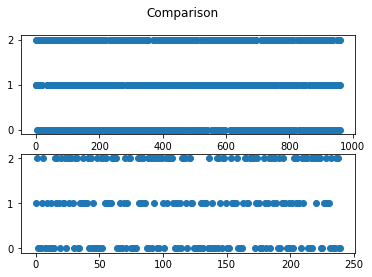

In [20]:
# Comparison

plt.figure(figsize=(16,9))
fig, ax = plt.subplots(2)

fig.suptitle('Comparison')

ax[0].scatter(range(len(FERTILISER_TRAIN)), FERTILISER_TRAIN['target_output'])
ax[1].scatter(range(len(FERTILISER_TEST)), FERTILISER_TEST['target_output'])
plt.show()

In [21]:
import seaborn as sns
#sns.pairplot(FERTILISER_TRAIN)

In [22]:
#fertiliser_train = df_to_dataset(FERTILISER_TRAIN)
#fertiliser_test = df_to_dataset(FERTILISER_TEST)
#dataset = dataset.shuffle(len(_fert)).batch(1)

In [23]:
# Create a tf.Dataset
train_features = np.array(FERTILISER_TRAIN_FEATURES)
train_labels = np.array(FERTILISER_TRAIN_LABEL)

test_features = np.array(FERTILISER_TEST_FEATURES)
test_labels = np.array(FERTILISER_TEST_LABEL)

In [24]:
train_features[0]

array([0.25354676, 0.91811832, 3.        , 1.        ])

In [25]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()

# Define model
predict_fert = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation=tf.nn.relu, input_shape=[4]),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(1),
    #tf.keras.layers.Lambda(lambda x: x * 100)
])

predict_fert.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 8,769
Trainable params: 8,769
Non-trainable params: 0
_________________________________________________________________


In [26]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-10 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-10, momentum=0.5)

predict_fert.compile(
    optimizer = optimizer,
    loss = tf.keras.losses.MeanSquaredError(),
    metrics = ['mae']
)

hist = predict_fert.fit(
    train_features, train_labels,
    #fertiliser,
    epochs = 300,
    validation_data = (test_features, test_labels),
    callbacks = [lr_schedule]
 )

 - 0s 4ms/step - loss: 0.1449 - mae: 0.3178 - val_loss: 0.1510 - val_mae: 0.3255
Epoch 144/300
31/31 [==============================] - 0s 4ms/step - loss: 0.1442 - mae: 0.3182 - val_loss: 0.1392 - val_mae: 0.3104
Epoch 145/300
31/31 [==============================] - 0s 4ms/step - loss: 0.1309 - mae: 0.2982 - val_loss: 0.1326 - val_mae: 0.3005
Epoch 146/300
31/31 [==============================] - 0s 4ms/step - loss: 0.1333 - mae: 0.3000 - val_loss: 0.1277 - val_mae: 0.2943
Epoch 147/300
31/31 [==============================] - 0s 4ms/step - loss: 0.1178 - mae: 0.2773 - val_loss: 0.1190 - val_mae: 0.2825
Epoch 148/300
31/31 [==============================] - 0s 4ms/step - loss: 0.1189 - mae: 0.2802 - val_loss: 0.1187 - val_mae: 0.2841
Epoch 149/300
31/31 [==============================] - 0s 4ms/step - loss: 0.1124 - mae: 0.2721 - val_loss: 0.1073 - val_mae: 0.2685
Epoch 150/300
31/31 [==============================] - 0s 4ms/step - loss: 0.0982 - mae: 0.2550 - val_loss: 0.0979 - val_

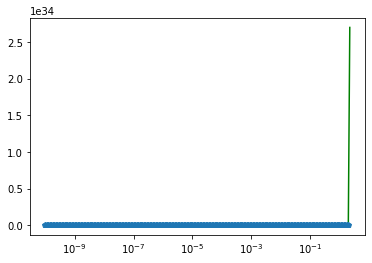

In [28]:
plt.semilogx(
    hist.history['lr'], hist.history['loss'], 'r',
    hist.history['lr'], hist.history['mae'], 'g',
    hist.history['lr'], hist.history['val_loss'], 'b',
    hist.history['lr'], hist.history['val_mae'], 'p'
)
plt.show()

#plt.semilogx(hist.history['lr'], hist.history['loss'])
#plt.show()

In [29]:
# Second optimisation run
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()

# Define model
predict_fert = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation=tf.nn.relu, input_shape=[4]),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(1),
    #tf.keras.layers.Lambda(lambda x: x * 100)
])

predict_fert.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 8,769
Trainable params: 8,769
Non-trainable params: 0
_________________________________________________________________


In [30]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-7 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-7, momentum=0.9)

predict_fert.compile(
    optimizer = optimizer,
    loss = tf.keras.losses.MeanSquaredError(),
    metrics = ['mae']
)

hist = predict_fert.fit(
    train_features, train_labels,
    #fertiliser,
    epochs = 120,
    validation_data = (test_features, test_labels),
    callbacks = [lr_schedule]
 )

Epoch 1/120
31/31 [==============================] - 1s 8ms/step - loss: 1.2059 - mae: 0.8454 - val_loss: 1.0498 - val_mae: 0.7741
Epoch 2/120
31/31 [==============================] - 0s 4ms/step - loss: 1.2053 - mae: 0.8415 - val_loss: 1.0489 - val_mae: 0.7735
Epoch 3/120
31/31 [==============================] - 0s 4ms/step - loss: 1.2476 - mae: 0.8597 - val_loss: 1.0478 - val_mae: 0.7728
Epoch 4/120
31/31 [==============================] - 0s 4ms/step - loss: 1.2388 - mae: 0.8613 - val_loss: 1.0467 - val_mae: 0.7720
Epoch 5/120
31/31 [==============================] - 0s 4ms/step - loss: 1.1506 - mae: 0.8178 - val_loss: 1.0454 - val_mae: 0.7712
Epoch 6/120
31/31 [==============================] - 0s 4ms/step - loss: 1.2552 - mae: 0.8771 - val_loss: 1.0440 - val_mae: 0.7702
Epoch 7/120
31/31 [==============================] - 0s 4ms/step - loss: 1.2776 - mae: 0.8664 - val_loss: 1.0424 - val_mae: 0.7692
Epoch 8/120
31/31 [==============================] - 0s 4ms/step - loss: 1.1589 - m

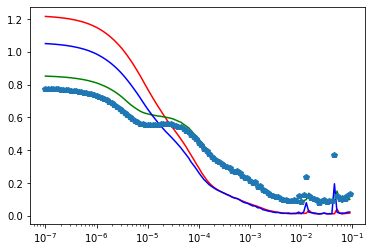

In [31]:
plt.semilogx(
    hist.history['lr'], hist.history['loss'], 'r',
    hist.history['lr'], hist.history['mae'], 'g',
    hist.history['lr'], hist.history['val_loss'], 'b',
    hist.history['lr'], hist.history['val_mae'], 'p'
)
plt.show()

Verdict: 1e-3.

In [32]:
# Second optimisation run
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()

# Define model
predict_fert = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation=tf.nn.relu, input_shape=[4]),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1),
    #tf.keras.layers.Lambda(lambda x: x * 100)
])

predict_fert.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 8,769
Trainable params: 8,769
Non-trainable params: 0
_________________________________________________________________


In [33]:
#lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#    lambda epoch: 1e-7 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=5e-3, momentum=0.9)

predict_fert.compile(
    optimizer = optimizer,
    loss = tf.keras.losses.MeanSquaredError(),
    metrics = ['mae']
)

hist = predict_fert.fit(
    train_features, train_labels,
    #fertiliser,
    epochs = 250,
    validation_data = (test_features, test_labels)#,
    #callbacks = [lr_schedule]
 )

 mae: 0.0749 - val_loss: 0.0093 - val_mae: 0.0745
Epoch 101/250
31/31 [==============================] - 0s 4ms/step - loss: 0.0088 - mae: 0.0731 - val_loss: 0.0083 - val_mae: 0.0725
Epoch 102/250
31/31 [==============================] - 0s 4ms/step - loss: 0.0082 - mae: 0.0735 - val_loss: 0.0087 - val_mae: 0.0766
Epoch 103/250
31/31 [==============================] - 0s 4ms/step - loss: 0.0088 - mae: 0.0756 - val_loss: 0.0153 - val_mae: 0.1035
Epoch 104/250
31/31 [==============================] - 0s 4ms/step - loss: 0.0155 - mae: 0.0986 - val_loss: 0.0084 - val_mae: 0.0730
Epoch 105/250
31/31 [==============================] - 0s 4ms/step - loss: 0.0093 - mae: 0.0760 - val_loss: 0.0089 - val_mae: 0.0747
Epoch 106/250
31/31 [==============================] - 0s 4ms/step - loss: 0.0085 - mae: 0.0730 - val_loss: 0.0086 - val_mae: 0.0714
Epoch 107/250
31/31 [==============================] - 0s 4ms/step - loss: 0.0084 - mae: 0.0716 - val_loss: 0.0081 - val_mae: 0.0711
Epoch 108/250
31/31

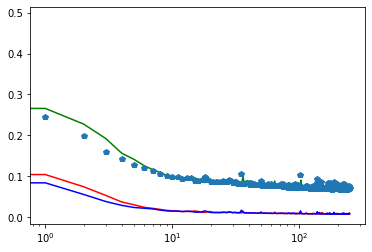

In [34]:
plt.semilogx(
    range(len(hist.history['loss'])), hist.history['loss'], 'r',
    range(len(hist.history['mae'])), hist.history['mae'], 'g',
    range(len(hist.history['val_loss'])), hist.history['val_loss'], 'b',
    range(len(hist.history['val_mae'])), hist.history['val_mae'], 'p'
)
plt.show()

In [35]:
predictions_N = []
predictions_N = predict_fert.predict(
    FERTILISER_TRAIN_FEATURES[FERTILISER_TRAIN_FEATURES['target_output'] == 0].values
)
predictions_N = np.array(predictions_N[:, 0])
print(predictions_N.shape)

(314,)


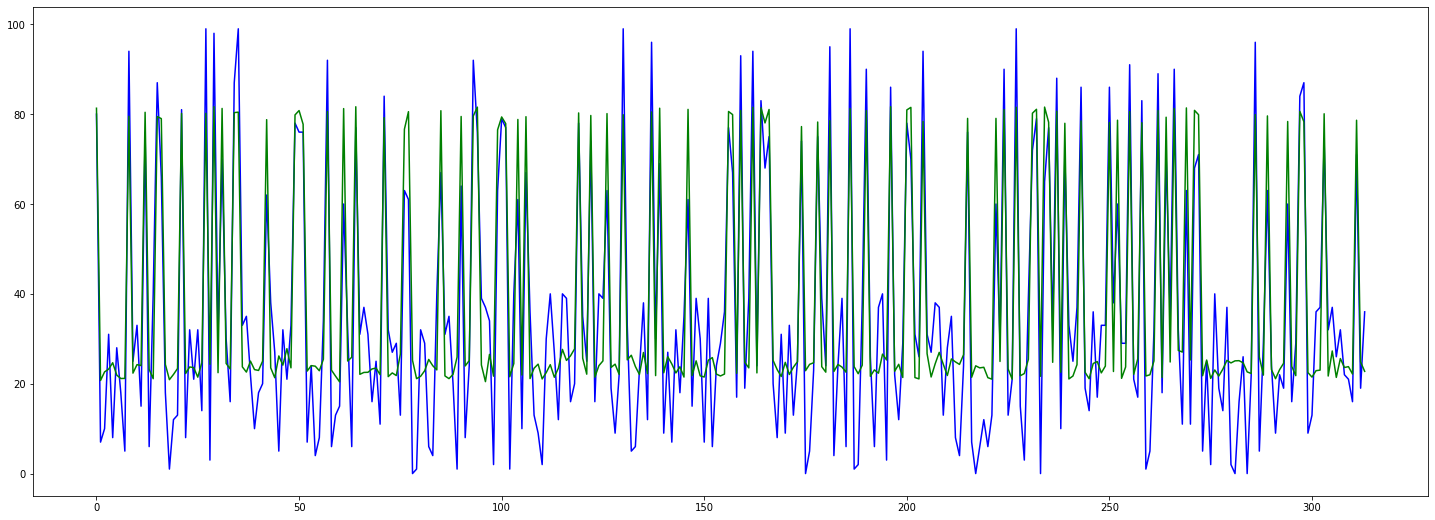

In [36]:
# Scatterplot
plt.figure(figsize=(25,9))
plt.plot(
    range(len(FERTILISER_TRAIN[FERTILISER_TRAIN['target_output'] == 0])),
    FERTILISER_TRAIN[FERTILISER_TRAIN['target_output'] == 0]['output'].values * 100,
    'b',
    range(len(predictions_N)),
    predictions_N * 100,
    'g'
)
plt.show()

In [37]:
predictions_P = []
predictions_P = predict_fert.predict(
    FERTILISER_TRAIN_FEATURES[FERTILISER_TRAIN_FEATURES['target_output'] == 1].values
)
predictions_P = np.array(predictions_P[:, 0])
print(predictions_P.shape)

(329,)


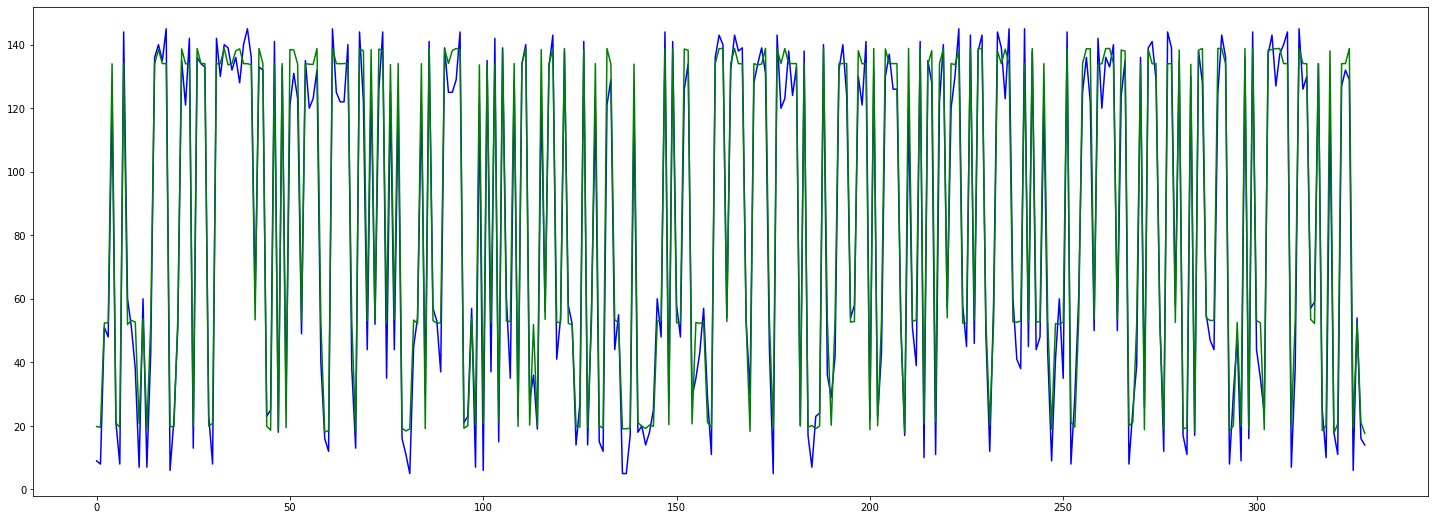

In [38]:
# Scatterplot
plt.figure(figsize=(25,9))
plt.plot(
    range(len(FERTILISER_TRAIN[FERTILISER_TRAIN['target_output'] == 1])),
    FERTILISER_TRAIN[FERTILISER_TRAIN['target_output'] == 1]['output'].values * 100,
    'b',
    range(len(predictions_P)),
    predictions_P * 100,
    'g'
)
plt.show()

In [39]:
predict_fert.save_weights('./weights/fertilizer-prediction/fertilizer-prediction')

In [46]:
predict_fert.save('../model/fertilizer-prediction')      # TF2 Save File
predict_fert.save('../model/fertilizer-prediction.h5')   # HDF5

INFO:tensorflow:Assets written to: ../model/fertilizer-prediction\assets


In [42]:
# Playground
print(FERTILISER_TEST_FEATURES[0:2])
print(FERTILISER_TEST_LABEL[0:2])

   temperature  humidity  label  target_output
0     0.100108  0.902240      3              1
1     0.390656  0.820381      1              2
0    0.14
1    1.97
Name: output, dtype: float64
